In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data import

In [2]:
# show the datatable
df = pd.read_excel('./training_for_team7.xlsx')
#/Users/shenchen/Desktop/IDS/training_for_team7.xlsx
df.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,5,0,4,AFTERNOON,3,209,181,American Airlines Inc.,75506,4919,3103410,11744595,0.000098,0.000177,2,Chicago O'Hare International,41.978,-87.906,Dallas Fort Worth Regional,0.12,1.3,0.0,31,10.51
1,7,0,3,EVENING,6,102,50,SkyWest Airlines Inc.,62105,2765,2780593,3472966,0.000034,0.000099,18,Los Angeles International,33.942,-118.408,San Luis Obispo County Regional,0.00,0.0,0.0,70,9.17
2,3,0,3,MORNING,1,119,150,American Airlines Inc.,75506,1974,1472200,11744595,0.000098,0.000177,9,Logan International,42.364,-71.006,NONE,0.16,0.5,0.0,39,15.88
3,2,0,3,MIDDAY,2,45,150,American Airlines Inc.,75506,554,1391212,11744595,0.000098,0.000177,20,Fort Lauderdale-Hollywood International,26.074,-80.152,Douglas Municipal,0.00,0.0,0.0,70,9.62
4,6,1,2,AFTERNOON,2,96,79,Mesa Airlines Inc.,17869,1670,1827202,1191889,0.000000,0.000091,14,Phoenix Sky Harbor International,33.436,-112.009,Palm Springs International,0.00,0.0,0.0,71,3.80


# Data quality checking

In [3]:
# show the # instances and # varibales
df.shape

(50205, 24)

In [4]:
# show datatype and # nullvalues
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50205 entries, 0 to 50204
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DAY_OF_WEEK                    50205 non-null  int64  
 1   DEP_DEL15                      50205 non-null  int64  
 2   DISTANCE_GROUP                 50205 non-null  int64  
 3   DEP_BLOCK                      50205 non-null  object 
 4   SEGMENT_NUMBER                 50205 non-null  int64  
 5   CONCURRENT_FLIGHTS             50205 non-null  int64  
 6   NUMBER_OF_SEATS                50205 non-null  int64  
 7   CARRIER_NAME                   50205 non-null  object 
 8   AIRLINE_FLIGHTS_MONTH          50205 non-null  int64  
 9   AIRLINE_AIRPORT_FLIGHTS_MONTH  50205 non-null  int64  
 10  AVG_MONTHLY_PASS_AIRPORT       50205 non-null  int64  
 11  AVG_MONTHLY_PASS_AIRLINE       50205 non-null  int64  
 12  FLT_ATTENDANTS_PER_PASS        50205 non-null 

<ipython-input-4-0cdc197d4afa>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [5]:
# show the statistical descriptions
df1 = df.describe()
df1

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,5.020500e+04,5.020500e+04,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000,50205.000000
mean,3.845175,0.174246,3.821293,2.917976,85.144667,133.821213,59392.484155,3252.709949,1.600866e+06,7.849566e+06,0.000096,0.000136,11.668280,36.446695,-94.551209,0.098015,0.092774,0.389563,52.435036,8.545995
std,1.914273,0.379324,2.388659,1.701199,60.953925,46.396054,33088.264493,3896.782811,1.109697e+06,5.058956e+06,0.000085,0.000046,6.759745,5.543173,17.957971,0.290030,0.543972,1.515181,16.791617,4.350763
min,1.000000,0.000000,1.000000,1.000000,1.000000,44.000000,6713.000000,2.000000,8.973300e+04,4.737940e+05,0.000000,0.000007,1.000000,18.440000,-159.346000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000,36.000000,90.000000,23463.000000,657.000000,6.732210e+05,2.688839e+06,0.000034,0.000099,5.000000,32.899000,-111.967000,0.000000,0.000000,0.000000,40.000000,4.920000
50%,4.000000,0.000000,3.000000,3.000000,75.000000,143.000000,62105.000000,2173.000000,1.486066e+06,8.501631e+06,0.000062,0.000125,12.000000,36.127000,-87.906000,0.000000,0.000000,0.000000,54.000000,7.830000
75%,5.000000,0.000000,5.000000,4.000000,120.000000,172.000000,75506.000000,4483.000000,2.006675e+06,1.246018e+07,0.000144,0.000177,17.000000,40.696000,-80.936000,0.020000,0.000000,0.000000,64.000000,11.180000
max,7.000000,1.000000,11.000000,15.000000,289.000000,337.000000,107363.000000,18809.000000,4.365661e+06,1.338300e+07,0.000348,0.000229,32.000000,61.169000,-66.002000,4.600000,17.200000,25.200000,85.000000,26.620000


# Correlations between inputs

In [6]:
df.columns

Index(['DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'DEP_BLOCK',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

<AxesSubplot:>

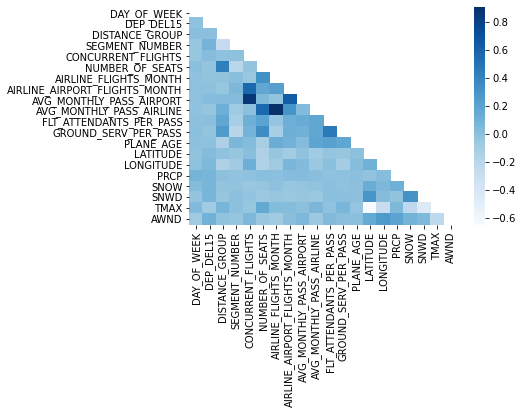

In [7]:
# correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr, cmap='Blues', annot=False, mask=mask.T)

# Delete features

In [8]:
df2 = df[['DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'DEP_BLOCK',
       'SEGMENT_NUMBER', 'NUMBER_OF_SEATS', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
        'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE',
       'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']]
# 'AVG_MONTHLY_PASS_AIRLINE','CONCURRENT_FLIGHTS'            delete as high correlation
# 'DEPARTING_AIRPORT','PREVIOUS_AIRPORT','CARRIER_NAME'      delete as categorical
df2.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,5,0,4,AFTERNOON,3,181,75506,4919,3103410,0.000098,0.000177,2,41.978,-87.906,0.12,1.3,0.0,31,10.51
1,7,0,3,EVENING,6,50,62105,2765,2780593,0.000034,0.000099,18,33.942,-118.408,0.00,0.0,0.0,70,9.17
2,3,0,3,MORNING,1,150,75506,1974,1472200,0.000098,0.000177,9,42.364,-71.006,0.16,0.5,0.0,39,15.88
3,2,0,3,MIDDAY,2,150,75506,554,1391212,0.000098,0.000177,20,26.074,-80.152,0.00,0.0,0.0,70,9.62
4,6,1,2,AFTERNOON,2,79,17869,1670,1827202,0.000000,0.000091,14,33.436,-112.009,0.00,0.0,0.0,71,3.80


# Train test split

In [9]:
from sklearn.model_selection import train_test_split
rdn_seed = 4
np.random.seed(rdn_seed)
train, test = train_test_split(df2, train_size = 0.8, random_state=rdn_seed)
train.shape, test.shape

((40164, 19), (10041, 19))

In [10]:
X_train = train.drop('DEP_DEL15',axis=1)
X_test  = test.drop('DEP_DEL15',axis=1)
y_train = train[['DEP_DEL15']]
y_test  = test[['DEP_DEL15']]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40164, 18), (10041, 18), (40164, 1), (10041, 1))

In [11]:
X_train.head()

,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
41063,1,1,AFTERNOON,5,110,73508,534,2006675,0.000144,0.000149,14,35.219,-80.936,0.0,0.0,0.0,58,6.93
29671,5,2,AFTERNOON,1,199,73508,18809,4365661,0.000144,0.000149,18,33.641,-84.427,0.0,0.0,0.0,54,6.93
48918,3,7,AFTERNOON,3,180,73508,115,154047,0.000144,0.000149,6,32.116,-110.941,0.0,0.0,0.0,73,4.47
41536,4,4,MIDDAY,3,76,19857,162,2907365,0.000000,0.000093,12,32.894,-97.030,0.0,0.0,0.0,52,8.28
17709,7,3,MIDDAY,2,143,107363,1285,955406,0.000062,0.000099,19,38.852,-77.037,0.0,0.0,0.0,47,6.71


# Scaler

In [12]:
# only scale the numerical variables
Cate_train = X_train.iloc[:,[0,2]]
Num_train  = X_train.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Cate_test  = X_test.iloc[:,[0,2]]
Num_test   = X_test.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Cate_train.shape, Num_train.shape, Cate_test.shape, Num_test.shape

((40164, 2), (40164, 16), (10041, 2), (10041, 16))

In [13]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(Num_train)
Num_train[:] = scalerX.transform(Num_train)
Num_train.head()

<ipython-input-13-3e3c24d587ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Num_train[:] = scalerX.transform(Num_train)
/Users/shenchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
41063,-1.183422,1.224823,-0.510505,0.429093,-0.698301,0.368222,0.565794,0.278512,0.348203,-0.225079,0.754968,-0.337224,-0.169564,-0.257515,0.335408,-0.373243
29671,-0.763211,-1.126669,1.408105,0.429093,4.022041,2.497325,0.565794,0.278512,0.941325,-0.509286,0.560716,-0.337224,-0.169564,-0.257515,0.097099,-0.373243
48918,1.337847,0.049077,0.998514,0.429093,-0.806527,-1.303867,0.565794,0.278512,-0.838041,-0.783948,-0.914614,-0.337224,-0.169564,-0.257515,1.229067,-0.938090
41536,0.077212,0.049077,-1.243457,-1.191055,-0.794387,1.181140,-1.122527,-0.915024,0.051642,-0.643825,-0.140558,-0.337224,-0.169564,-0.257515,-0.022056,-0.063267
17709,-0.342999,-0.538796,0.200890,1.451444,-0.504322,-0.580601,-0.398790,-0.798180,1.089605,0.429246,0.971921,-0.337224,-0.169564,-0.257515,-0.319942,-0.423758


In [14]:
Num_test.iloc[:] = scalerX.transform(Num_test)
Num_test.head()

/Users/shenchen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
22643,0.497424,-1.126669,0.179332,-0.395008,0.514136,1.358080,1.849759,2.016560,1.089605,0.992258,0.367133,-0.337224,-0.169564,0.539565,-1.094447,0.193899
28632,1.337847,0.636950,0.847612,-0.395008,0.464801,1.033084,1.849759,2.016560,-1.134602,0.595304,-0.577359,-0.337224,-0.169564,-0.257515,-0.260365,0.244414
41523,-0.763211,-0.538796,-0.100914,-1.073193,0.375431,1.358080,2.957662,-0.625793,-0.096639,0.992258,0.367133,-0.337224,-0.169564,-0.257515,-0.439097,1.374107
34334,0.077212,0.049077,0.610480,-1.082161,-0.005812,0.074219,0.751682,-0.193060,-0.096639,0.751096,1.153319,0.827698,-0.169564,-0.257515,-0.796561,0.193899
23583,-0.763211,1.812696,1.408105,0.429093,4.022041,2.497325,0.565794,0.278512,0.793044,-0.509286,0.560716,-0.337224,-0.169564,-0.257515,0.037521,-0.217107


In [15]:
# reunion the dataset
X_train_full = pd.concat([Cate_train,Num_train],axis=1)
X_test_full  = pd.concat([Cate_test,Num_test],axis=1)
X_train_full.shape, y_train.shape, X_test_full.shape, y_test.shape

((40164, 18), (40164, 1), (10041, 18), (10041, 1))

# Resampling (since it is an unbalanced dataset)

In [16]:
from imblearn.over_sampling import SMOTENC

# run SMOTENC
smnc = SMOTENC(random_state=rdn_seed, categorical_features=[0,1])
X_train_full_res, y_train_res = smnc.fit_resample(X_train_full, y_train)

print('before OverSampling, the shape of train_X: {}'.format(X_train_full.shape))
print('After OverSampling, the shape of train_X: {}'.format(X_train_full_res.shape))

before OverSampling, the shape of train_X: (40164, 18)
After OverSampling, the shape of train_X: (66274, 18)


In [17]:
X_y_train = pd.concat([y_train_res,X_train_full_res],axis=1)
X_y_test  = pd.concat([y_test,X_test_full],axis=1)
X_y_train.shape, X_y_test.shape

((66274, 19), (10041, 19))

In [18]:
X_y_train.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_BLOCK,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,0,1,AFTERNOON,-1.183422,1.224823,-0.510505,0.429093,-0.698301,0.368222,0.565794,0.278512,0.348203,-0.225079,0.754968,-0.337224,-0.169564,-0.257515,0.335408,-0.373243
1,0,5,AFTERNOON,-0.763211,-1.126669,1.408105,0.429093,4.022041,2.497325,0.565794,0.278512,0.941325,-0.509286,0.560716,-0.337224,-0.169564,-0.257515,0.097099,-0.373243
2,0,3,AFTERNOON,1.337847,0.049077,0.998514,0.429093,-0.806527,-1.303867,0.565794,0.278512,-0.838041,-0.783948,-0.914614,-0.337224,-0.169564,-0.257515,1.229067,-0.938090
3,0,4,MIDDAY,0.077212,0.049077,-1.243457,-1.191055,-0.794387,1.181140,-1.122527,-0.915024,0.051642,-0.643825,-0.140558,-0.337224,-0.169564,-0.257515,-0.022056,-0.063267
4,0,7,MIDDAY,-0.342999,-0.538796,0.200890,1.451444,-0.504322,-0.580601,-0.398790,-0.798180,1.089605,0.429246,0.971921,-0.337224,-0.169564,-0.257515,-0.319942,-0.423758


In [19]:
X_y_test = X_y_test.reset_index(drop=True)
X_y_test.head()

,DEP_DEL15,DAY_OF_WEEK,DEP_BLOCK,DISTANCE_GROUP,SEGMENT_NUMBER,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
0,0,3,MORNING,0.497424,-1.126669,0.179332,-0.395008,0.514136,1.358080,1.849759,2.016560,1.089605,0.992258,0.367133,-0.337224,-0.169564,0.539565,-1.094447,0.193899
1,0,4,EVENING,1.337847,0.636950,0.847612,-0.395008,0.464801,1.033084,1.849759,2.016560,-1.134602,0.595304,-0.577359,-0.337224,-0.169564,-0.257515,-0.260365,0.244414
2,0,2,MIDDAY,-0.763211,-0.538796,-0.100914,-1.073193,0.375431,1.358080,2.957662,-0.625793,-0.096639,0.992258,0.367133,-0.337224,-0.169564,-0.257515,-0.439097,1.374107
3,0,6,MIDDAY,0.077212,0.049077,0.610480,-1.082161,-0.005812,0.074219,0.751682,-0.193060,-0.096639,0.751096,1.153319,0.827698,-0.169564,-0.257515,-0.796561,0.193899
4,0,3,EVENING,-0.763211,1.812696,1.408105,0.429093,4.022041,2.497325,0.565794,0.278512,0.793044,-0.509286,0.560716,-0.337224,-0.169564,-0.257515,0.037521,-0.217107


In [20]:
X_y_train.to_excel('./train_1119.xlsx')

In [21]:
X_y_test.to_excel('./test_1119.xlsx')

# Parameter tunning on training set

In [22]:
# turn categorical variables into dummy variables
df_train = pd.read_excel('./preprocessed_data_21.xlsx')

df2_1 = pd.get_dummies(df_train[['DEP_BLOCK']])

df2_1 = df_train['DAY_OF_WEEK'].map({1:'DoW_Mon',2:'DoW_Tue',3:'DoW_Wed',4:'DoW_Thu',5:'DoW_Fri',6:'DoW_Sat',7:'DoW_Sun'})
df2_2 = pd.get_dummies(df2_1)

df_train = pd.concat([df_train,df2_1],axis=1)
df_train = pd.concat([df_train,df2_2],axis=1)
df_train = df_train.drop(['DEP_BLOCK','DAY_OF_WEEK'],axis=1)

df_train.head()

,SEGMENT_NUMBER,NUMBER_OF_SEATS,GROUND_SERV_PER_PASS,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,AIRLINE_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,AIRLINE_AIRPORT_FLIGHTS_MONTH,DISTANCE_GROUP,PLANE_AGE,AVG_MONTHLY_PASS_AIRPORT,DEP_DEL15,DoW_Fri,DoW_Mon,DoW_Sat,DoW_Sun,DoW_Thu,DoW_Tue,DoW_Wed
0,-0.539611,0.197837,-0.800877,-0.057674,0.438206,-0.131074,-0.17055,-0.257109,-0.145016,-0.318567,1.449789,-0.402495,-0.066391,-0.343833,0.197009,-0.782448,0,0,0,0,1,0,0,0
1,1.223869,-1.461803,-0.965284,-0.057674,0.438206,-0.337951,-0.17055,-0.257109,-0.145016,-1.502279,-1.254943,-1.126477,-0.811885,-0.343833,0.640817,-0.782448,0,0,0,0,0,0,1,0
2,0.636042,-0.211684,2.013186,0.997869,0.370046,-0.337951,-0.17055,0.534883,-1.097882,0.196291,-0.398166,1.846818,0.506908,-0.762482,1.232562,1.354026,0,0,0,0,0,0,0,1
3,0.636042,0.197837,-0.800877,-0.543141,-0.972157,-0.234513,-0.17055,-0.257109,1.046066,-0.883991,1.449789,-0.402495,0.460202,-0.762482,1.380498,0.203964,0,0,1,0,0,0,0,0
4,-0.539611,0.499590,0.275556,-0.506158,0.563778,-0.337951,-0.17055,-0.257109,0.986512,-0.782858,0.426606,0.562417,3.992125,0.074816,1.232562,2.491512,0,0,1,0,0,0,0,0


In [23]:
X_train = df_train.drop('DEP_DEL15',axis=1)
y_train = df_train['DEP_DEL15']
X_train.shape, y_train.shape

((40164, 23), (40164,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Logistic regression

In [25]:
# l1/l2, C tuning
pipe_log = LogisticRegression(solver = 'liblinear')

para_log = {
    'penalty': ('l1', 'l2'),
    'C'      : [0.01,0.1,0.5,1,5,10,100]
}

grid_search_log = GridSearchCV(
    pipe_log, 
    para_log, 
    scoring='roc_auc', 
    cv=5)

grid_search_log.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_log.best_score_)

best auc：0.632


In [26]:
grid_search_log.best_estimator_.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
best_logistic = LogisticRegression(
    solver  = 'liblinear',
    penalty = 'l1',
    C       = 5)
best_logistic.fit(X_train,y_train)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

# Tree

In [28]:
# max_depth, min_samples_leaf, min_samples_split tuning
pipe_tree = DecisionTreeClassifier()

para_tree = {
    'max_depth': np.arange(7, 15), 
    'min_samples_leaf': np.arange(7,15),
    'min_samples_split': np.arange(7,15)
}

grid_search_tree = GridSearchCV(
    pipe_tree, 
    para_tree, 
    scoring='roc_auc', 
    cv=5)

grid_search_tree.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_tree.best_score_)

best auc：0.635


In [29]:
grid_search_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 14,
 'min_samples_split': 11,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
best_decision_tree = DecisionTreeClassifier(
    max_depth         = 9,
    min_samples_leaf  = 10,
    min_samples_split = 11)
best_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=11)

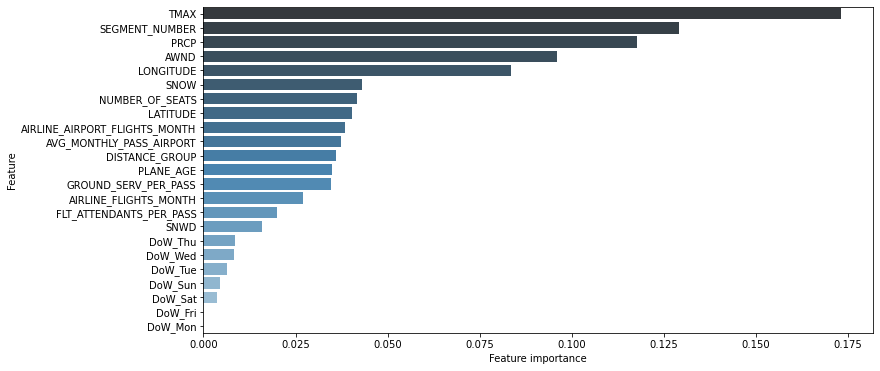

In [31]:
feature_importances_tree = dict()

for name, importance in zip(X_train.columns, best_decision_tree.feature_importances_): 
    feature_importances_tree[name]= importance
    
feature_importances_tree = sorted(feature_importances_tree.items(), key=lambda d: d[1], reverse=True)

y_tree=list()
x_tree=list()

for i in range(len(feature_importances_tree)):
    y_tree.append(feature_importances_tree[i][0])
    
for i in range(len(feature_importances_tree)):
    x_tree.append(feature_importances_tree[i][1])
    
plt.figure(figsize=(12,6))
sns.barplot(y=y_tree,x=x_tree,orient='h',palette="Blues_r_d")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Random Forest

In [32]:
# 1.n_estimator tuning
pipe_rtree = RandomForestClassifier()

para_rtree_1 = {
    'n_estimators': range(100, 151, 10),
}

grid_search_rtree = GridSearchCV(
    pipe_rtree, 
    para_rtree_1, 
    scoring='roc_auc', 
    cv=5)

grid_search_rtree.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_rtree.best_score_)

best auc：0.663


In [33]:
grid_search_rtree.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 140,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# 2.max_depth tuning
pipe_rtree = RandomForestClassifier(
    n_estimators = 130)

para_rtree_2 = {
    'max_depth': range(5,31,5),
}

grid_search_rtree = GridSearchCV(
    pipe_rtree, 
    para_rtree_2, 
    scoring='roc_auc', cv=5)

grid_search_rtree.fit(X_train,y_train)
print('best auc：%0.3f' % grid_search_rtree.best_score_)

best auc：0.680


In [35]:
grid_search_rtree.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 130,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
# 3.min_samples_split tuning
pipe_rtree = RandomForestClassifier(
    n_estimators = 130, 
    max_depth    = 15)

para_rtree_3 = {
    'min_samples_split':np.arange(2, 21, 2)
}

grid_search_rtree = GridSearchCV(
    pipe_rtree, 
    para_rtree_3, 
    scoring='roc_auc', 
    cv=5)

grid_search_rtree.fit(X_train,y_train)
print('最佳效果：%0.3f' % grid_search_rtree.best_score_)

最佳效果：0.684


In [37]:
grid_search_rtree.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 130,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
best_random_tree = RandomForestClassifier(
    n_estimators = 130,
    max_depth    = 15,
    min_samples_split = 10)

best_random_tree.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=130)

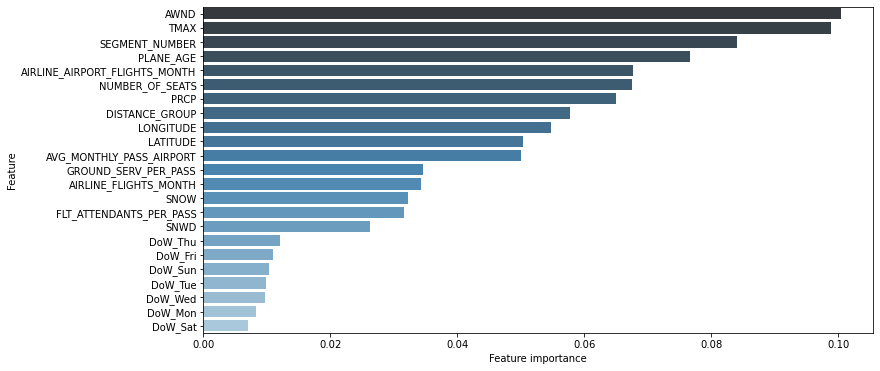

In [39]:
feature_importances_rtree = dict()
for name, importance in zip(X_train.columns, best_random_tree.feature_importances_): 
    feature_importances_rtree[name]= importance
    
feature_importances_rtree = sorted(feature_importances_rtree.items(), key=lambda d: d[1], reverse=True)

y_rtree=list()
x_rtree=list()

for i in range(len(feature_importances_rtree)):
    y_rtree.append(feature_importances_rtree[i][0])
    
for i in range(len(feature_importances_rtree)):
    x_rtree.append(feature_importances_rtree[i][1])
    
plt.figure(figsize=(12,6))
sns.barplot(y=y_rtree,x=x_rtree,orient='h',palette="Blues_r_d")
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# Other data explorations

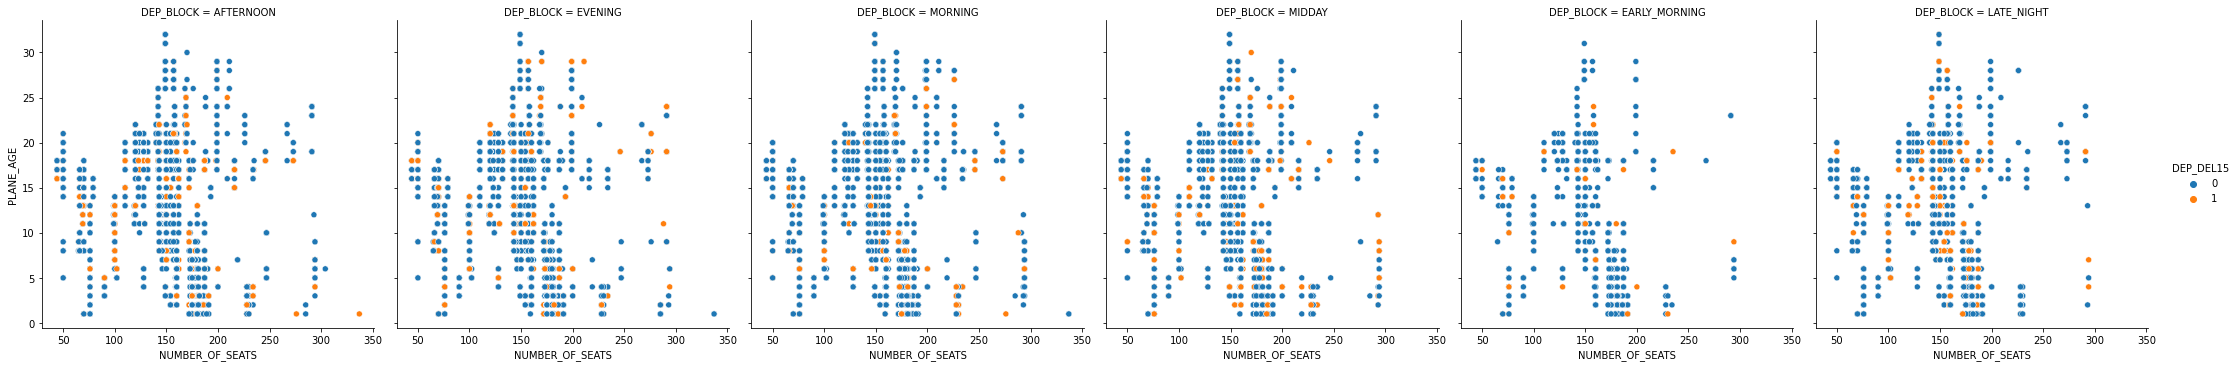

In [40]:
sns.relplot(x="NUMBER_OF_SEATS",y="PLANE_AGE",col="DEP_BLOCK",hue='DEP_DEL15',row=None,kind='scatter',data=df)

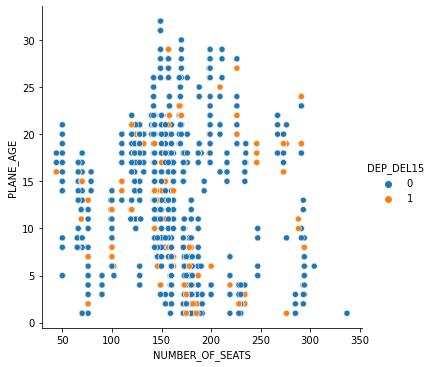

In [41]:
sns.relplot(x="NUMBER_OF_SEATS",y="PLANE_AGE",col=None,hue='DEP_DEL15',row=None,kind='scatter',data=df)